In [1]:
import xcdat
from xcdat.regridder import grid
import cdms2


In [2]:
# dataset to use
dpath = '/Users/zhang40/Documents/ACME_simulations/E3SM_v1/TS_185001_201312.nc'
# open dataset
ds = xcdat.open_dataset(dpath, center_times=True)


In [3]:
# create output grid
out_grid = grid.create_uniform_grid(-88.75, 88.76, 2.5, 1.25, 360., 2.5)

# regrid
ds2 = ds.regridder.horizontal("TS", out_grid, tool="xesmf", method="bilinear", periodic=True)

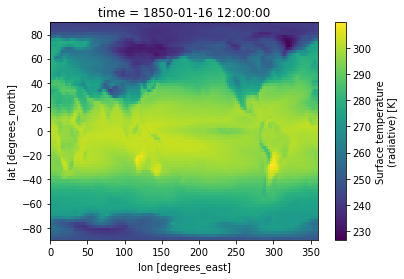

In [4]:
ds2.TS[0,].plot()

In [5]:
ds3 = ds.regridder.horizontal("TS", out_grid, tool="xesmf", method="conservative_normed",periodic=True)

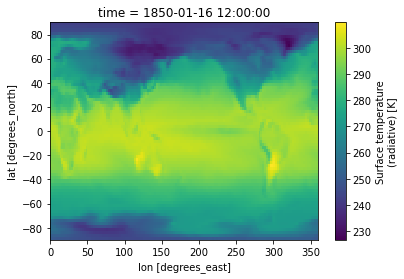

In [6]:
ds3.TS[0,].plot()

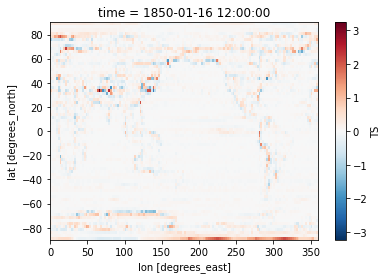

In [7]:
(ds3.TS[0,]-ds2.TS[0,]).plot()

In [8]:
fin = cdms2.open(dpath)

In [9]:
var = fin('TS')

In [10]:
# Note input for create uniform grids between cdms2 and xcdat are differet.
out_grid2=cdms2.grid.createUniformGrid(-88.75, 72, 2.5, 1.25, 144, 2.5)

In [11]:
var2 = var.regrid(out_grid2, regrid_tool="esmf", regrid_method="linear")

In [12]:
var3 = var.regrid(out_grid2, regrid_tool="esmf", regrid_method="conservative")


coordMin =  -90.00, boundMin =  -90.00, coordMax =   90.00, boundMax =   90.00
              


In [13]:
# The difference of data value resulted from cdms2 and xcdat regriders are always multiples of 1.52587890625e-05 /megabits
var2[0,]-ds2.TS[0,]

variable_22
masked_array(
  data=[[1.52587890625e-05, 0.0, 0.0, ..., 0.0, 1.52587890625e-05,
         1.52587890625e-05],
        [0.0, 1.52587890625e-05, 1.52587890625e-05, ..., 0.0, 0.0, 0.0],
        [0.0, 1.52587890625e-05, -1.52587890625e-05, ...,
         3.0517578125e-05, 0.0, 0.0],
        ...,
        [-1.52587890625e-05, -1.52587890625e-05, 0.0, ...,
         1.52587890625e-05, 0.0, 0.0],
        [0.0, -1.52587890625e-05, 1.52587890625e-05, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=1e+20,
  dtype=float32)

In [14]:
var3[0,]-ds3.TS[0,]

variable_28
masked_array(
  data=[[0.0, 0.0, 0.0, ..., 1.52587890625e-05, -1.52587890625e-05,
         1.52587890625e-05],
        [0.0, -1.52587890625e-05, -1.52587890625e-05, ...,
         1.52587890625e-05, 0.0, 0.0],
        [0.0, -1.52587890625e-05, 0.0, ..., 0.0, 0.0, 0.0],
        ...,
        [0.0, 0.0, -1.52587890625e-05, ..., 1.52587890625e-05, 0.0,
         -1.52587890625e-05],
        [0.0, 0.0, 1.52587890625e-05, ..., 0.0, 0.0, -1.52587890625e-05],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 1.52587890625e-05]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=1e+20,
  dtype=float32)

In [15]:
dpath = '/Users/zhang40/Documents/ACME_simulations/LAISHA_001101_002012.nc'

In [16]:
ds = xcdat.open_dataset(dpath)

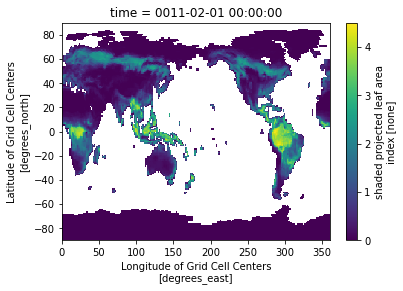

In [17]:
ds.LAISHA[0,].plot()

In [18]:
ds2 = ds.regridder.horizontal("LAISHA", out_grid, tool="xesmf", method="bilinear")

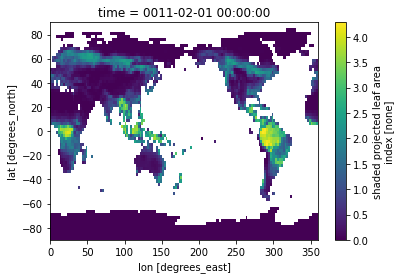

In [19]:
ds2.LAISHA[0,].plot() #prime medirian

In [20]:
ds3 = ds.regridder.horizontal("LAISHA", out_grid, tool="xesmf", method="conservative_normed")

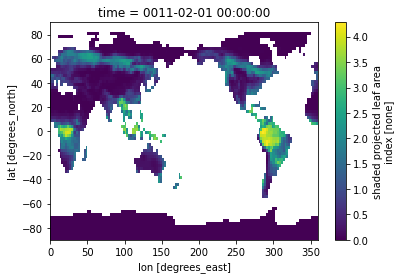

In [21]:
ds3.LAISHA[0,].plot()

In [22]:
fin = cdms2.open(dpath)

In [23]:
var = fin('LAISHA')

In [24]:
var2 = var.regrid(out_grid2, regrid_tool="esmf", regrid_method="linear")

In [25]:
var2[0,]-ds2.LAISHA[0,]

variable_43
masked_array(
  data=[[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

In [26]:
var3 = var.regrid(out_grid2, regrid_tool="esmf", regrid_method="conservative")

In [27]:
(var3[0,]-ds3.LAISHA[0,])[:,0]

variable_61
masked_array(data=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --,
                   -5.960464477539063e-08, 0.0, -1.4901161193847656e-08,
                   0.0, 1.862645149230957e-09, -1.1641532182693481e-10,
                   0.0, 0.0, -5.820766091346741e-11, 0.0, 0.0, 0.0, 0.0,
                   0.0, 0.0, -1.1920928955078125e-07, 0.0,
                   2.9802322387695312e-08, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --],
             mask=[False, False, False, False, False, False, False, False,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,